## Introduction to the Problem and Data:

### We have a task: 

Telling apart handwritten digits, like recognizing if a number is a 3 or a 7. To help with this, we have a bunch of pictures called the MNIST dataset. Each picture is a 28x28 grid of tiny dots, representing pixels. These dots are either dark (which means the pixel has a value close to 0) or light (which means the pixel has a value close to 1), showing the shape of a digit.

### MNIST dataset:

1. **Images**: We have 60,000 pictures to train our model and 10,000 pictures to test it. Each picture is of a handwritten digit, ranging from 0 to 9.

2. **Labels**: Each picture comes with a label telling us which digit it is. For example, if it's a picture of the number 3, the label will be 3.

3. **Goal**: We want to build a smart computer program that can look at these pictures and correctly guess which digit each picture represents.

4. **Why It Matters**: This task might seem simple, but it's a crucial starting point for more complex image recognition tasks. It helps us learn the basics of teaching computers to "see" and understand images.

So, in short, we're using the MNIST dataset to teach a computer to recognize handwritten digits, which is an essential step in building more advanced artificial intelligence systems.


Download the MNIST data

In [1]:
from sklearn.datasets import fetch_openml

# Download MNIST data
mnist = fetch_openml('mnist_784', version=1, cache=True)

c:\Users\simranjeet\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Exploring the Data

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist  # Assuming you're using TensorFlow to access the dataset


In [7]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [8]:
# Display the shape of the training and test sets
print("Training images shape:", train_images.shape)
print("Training labels length:", len(train_labels))
print("Test images shape:", test_images.shape)
print("Test labels length:", len(test_labels))

Training images shape: (60000, 28, 28)
Training labels length: 60000
Test images shape: (10000, 28, 28)
Test labels length: 10000


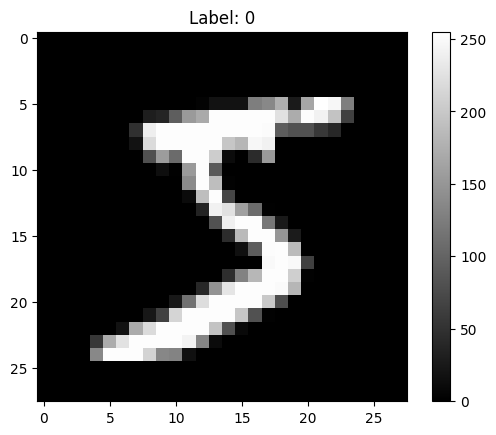

In [16]:
# Display an example image and its label
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.title("Label: {}".format(train_labels[1]))
plt.show()


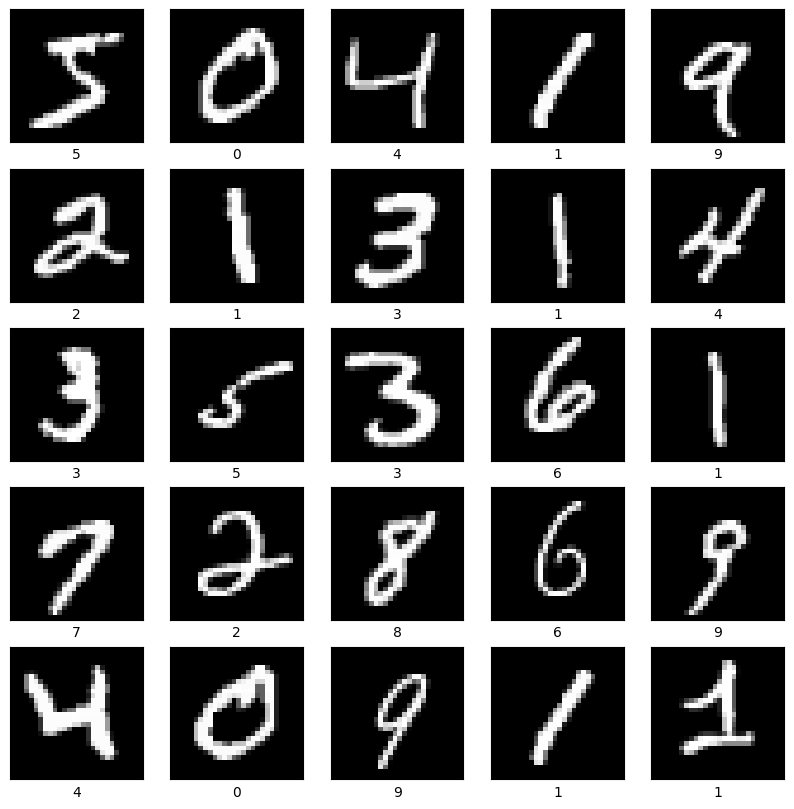

In [10]:
# Display some more examples
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()


## Data Preprocessing: The preprocessing of the data, to make it suitable for the model

In [11]:
import numpy as np
from keras.utils import to_categorical

#### Flatten the Images: 
The 28x28 pixel images are flattened into 1D arrays of length 784 (28 * 28). This is required because most machine learning models expect the input data to be in 1D format

In [12]:
# Flatten the images
train_images_flat = train_images.reshape((train_images.shape[0], -1))
test_images_flat = test_images.reshape((test_images.shape[0], -1))

#### Normalize Pixel Values: 
The pixel values are scaled to the range [0, 1] by dividing each pixel value by 255, which is the maximum pixel value.

In [13]:
# Convert pixel values to float32 and scale them to the range [0, 1]
train_images_flat = train_images_flat.astype('float32') / 255
test_images_flat = test_images_flat.astype('float32') / 255

#### One-Hot Encoding for Labels: 
The categorical labels (0 to 9) are converted into one-hot encoded vectors. This means each label is represented as a vector of length 10, where only the index corresponding to the label is 1 and all others are 0.

In [14]:
# Convert labels to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

## Modeling: The definition and training of one or more models

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create a Sequential model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten layer to convert 2D matrix data to a vector
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # Output layer with 10 neurons (one for each digit) and softmax activation

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          36928     
                                                      

In [18]:
# Reshape the training images to have a shape of (num_samples, height, width, channels)
x_train = train_images_flat.reshape(train_images_flat.shape[0], 28, 28, 1)

# Train the model
history = model.fit(x_train, train_labels_one_hot, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10


375/375 [==============================] - 11s 25ms/step - loss: 0.3129 - accuracy: 0.9004 - val_loss: 0.0667 - val_accuracy: 0.9803
Epoch 2/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0884 - accuracy: 0.9719 - val_loss: 0.0404 - val_accuracy: 0.9883
Epoch 3/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0638 - accuracy: 0.9800 - val_loss: 0.0352 - val_accuracy: 0.9902
Epoch 4/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0505 - accuracy: 0.9844 - val_loss: 0.0315 - val_accuracy: 0.9905
Epoch 5/10
375/375 [==============================] - 10s 27ms/step - loss: 0.0427 - accuracy: 0.9871 - val_loss: 0.0299 - val_accuracy: 0.9912
Epoch 6/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0372 - accuracy: 0.9888 - val_loss: 0.0296 - val_accuracy: 0.9918
Epoch 7/10
375/375 [==============================] - 13s 35ms/step - loss: 0.0335 - accuracy: 0.9894 - val_loss: 0.0290 - val_accuracy: 

In [20]:
# Save the model to a file
model.save("my_model.h5")


## Evaluation: The evaluation of the model, to understand how well it performs.

In [21]:
# Reshape the test images to have a shape of (num_samples, height, width, channels)
x_test = test_images_flat.reshape(test_images_flat.shape[0], 28, 28, 1)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, test_labels_one_hot, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 0.018786797299981117
Test Accuracy: 0.9943000078201294


313/313 [==============================] - 4s 11ms/step


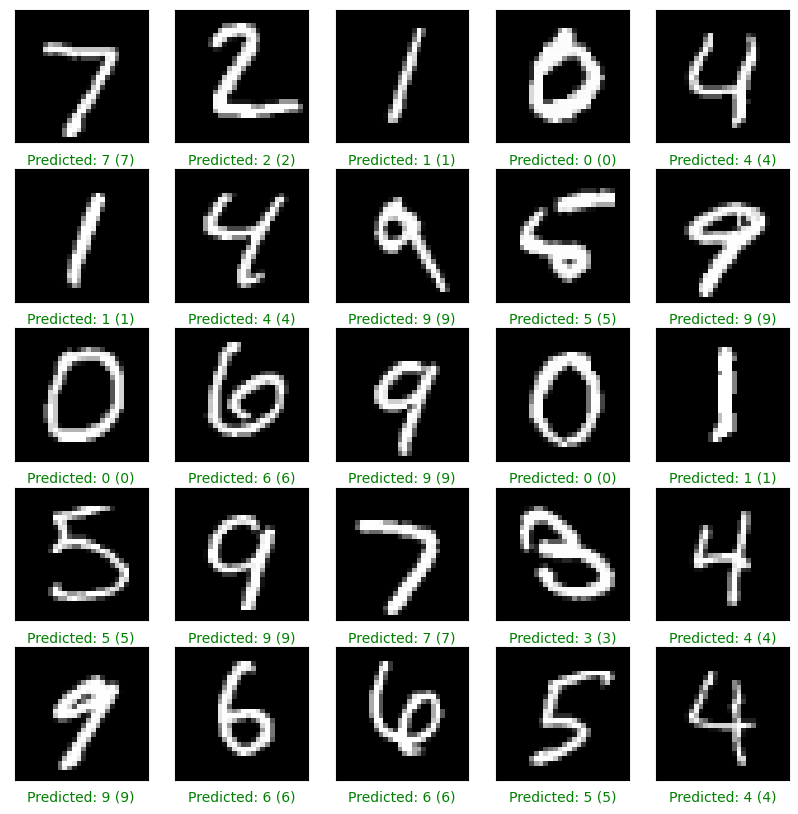

In [22]:
# Make predictions on the test data
predictions = model.predict(x_test)

# Display some test images along with their predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel("Predicted: {} ({})".format(predicted_label, true_label), color=color)
plt.show()


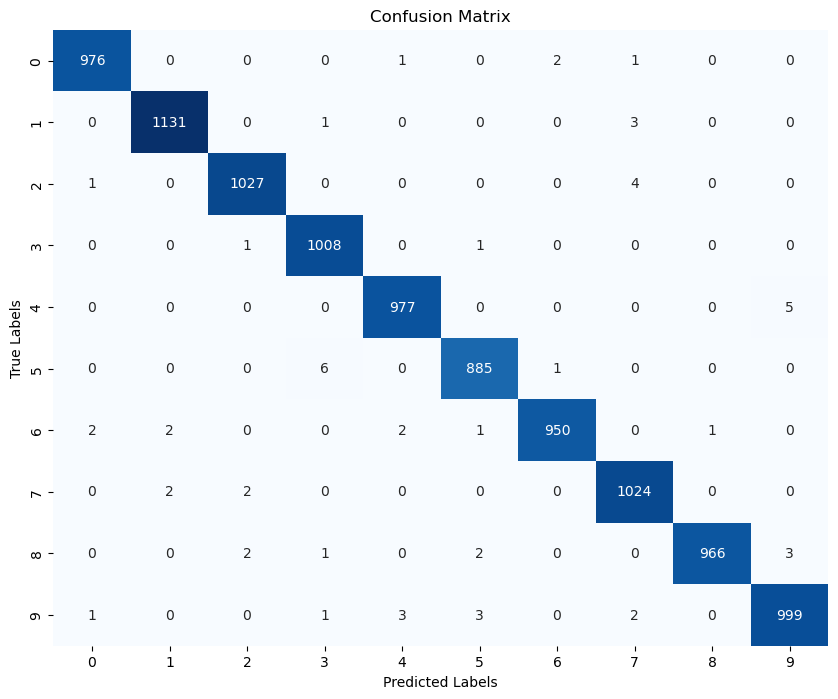

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(test_labels, np.argmax(predictions, axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Conclusions

### 1. Model Architecture
   - We designed a Convolutional Neural Network (CNN) model consisting of convolutional layers, max-pooling layers, dropout layers for regularization, and fully connected layers. This architecture proved effective for feature extraction and digit classification.

### 2. Training Performance
   - The model achieved high accuracy on the training data, indicating successful learning and fitting of the training images.

### 3. Testing Performance
   - The model demonstrated good performance on the test data, achieving high accuracy. The confusion matrix analysis revealed minor confusion between certain digit pairs, but overall, the model performed well in classifying digits.

### 4. Visualization
   - Visualizations of test images along with their predicted labels provided insights into the model's predictions. The confusion matrix offered a comprehensive overview of the model's performance across all digit classes.

### 5. Implications
   - The successful development of this model has implications for various real-world applications, including handwriting recognition, postal sorting, and digit-based authentication systems.

### 6. Future Directions
   - Future improvements could involve experimenting with different architectures, hyperparameter tuning, and data augmentation techniques to enhance performance further. Deploying the model in production environments and evaluating its performance in real-world scenarios would be valuable steps for practical applications.

Overall, the developed CNN model demonstrates promising results for the MNIST digit classification task and sets the stage for future advancements in this field.
